In [40]:
import cv2
import numpy as np
import time
import os
import Cards
import VideoStream
import matplotlib.pyplot as plt

### ---- INITIALIZATION ---- ###
# Define constants and initialize variables

## Camera settings
IM_WIDTH = 1280
IM_HEIGHT = 720 
FRAME_RATE = 10

## Initialize calculated frame rate because it's calculated AFTER the first time it's displayed
frame_rate_calc = 1
freq = cv2.getTickFrequency()

## Define font to use
font = cv2.FONT_HERSHEY_SIMPLEX

train_ranks = Cards.load_ranks('/Card_Imgs/')
train_suits = Cards.load_suits('/Card_Imgs/')

In [41]:
img = cv2.imread('heart3.jpg')

In [42]:
# Pre-process camera image (gray, blur, and threshold it)
pre_proc = Cards.preprocess_image(img)

# Find and sort the contours of all cards in the image (query cards)
cnts_sort, cnt_is_card = Cards.find_cards(pre_proc)

In [35]:
cards = []
k = 0

In [36]:
for i in range(len(cnts_sort)):
    if (cnt_is_card[i] == 1):

        # Create a card object from the contour and append it to the list of cards.
        # preprocess_card function takes the card contour and contour and
        # determines the cards properties (corner points, etc). It generates a
        # flattened 200x300 image of the card, and isolates the card's
        # suit and rank from the image.
        cards.append(Cards.preprocess_card(cnts_sort[i],image))

        # Find the best rank and suit match for the card.
        cards[k].best_rank_match,cards[k].best_suit_match,cards[k].rank_diff,cards[k].suit_diff = Cards.match_card(cards[k],train_ranks,train_suits)

        # Draw center point and match result on the image.
        image = Cards.draw_results(image, cards[k])
        k = k + 1

In [37]:
blur = cv2.GaussianBlur(img, (5,5), 0)

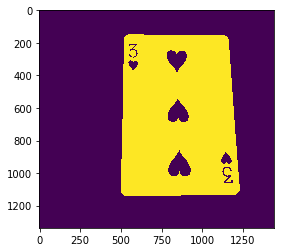

In [38]:
plt.imshow(pre_proc)